<a href="https://colab.research.google.com/github/junehyung1112/hello-world/blob/master/9%EA%B0%95_%EB%8B%A4%EC%B8%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EA%B5%AC%ED%98%84_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#다층 퍼셉트론을 이용해 다양한 비선형 분포를 분석해보자.
#신경망 자체의 성능 향상에는 한계가 있어 외적으로 개선함.
#다층 신경망은 은닉층을 추가하는 구조 변경을 통해 복잡한 문제를 해결.
#입력층(가중치) -> 은닉층 -> 출력층 : 순방향 전파
#순방향 전파는 단순한 가중치율의 곱과 활성화 함수만 계산하기 때문에 예측 속도가 빠름.
#신경망에서는 활성 함수로 주로 sigmoid 함수를 사용함.
#다층 신경망에서는 반드시 비선형 함수를 사용해야함. 
#선형 함수는 깊은 네트워크 구조를 만들어낼 수 없기 때문.
#비선형 함수와 다수의 은닉층을 사용하면 비선형 결정 경계면을 갖게 되어 복잡한 분포를 좀 더 정교하게 분류할 수 있음
#임계논리함수 : 계단함수에서 미분 가능한 부분을 완화시킨 함수.
#출력 값이 0과 1로 제한되기 때문에 발산하지 않음. 하지만 극점에서 갑자기 미분값이 변함.
#시그모이드 함수는 전구간에서 미분이 가능하고 0~1사이에 수렴이 되기 때문에 학습에 적합.
#하지만 신경망이 깊어질 경우 문제가 발생할 수 있음.
#다층신경망의 마지막 층은 목적값과 이전의 값을 바탕으로 오차를 계산 가능 
#이를 토대로 w2와 b2를 업데이트 할 수있음
#하지만 이전 층의 경우 w와 b를 학습할 수가 없음(오차를 계산할 수 없기 때문에)
#역전파 오류법 : 출력층에서 입력층까지 거꾸로 오류를 계산해가며 모든 계층을 학습.



In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

%matplotlib inline

sess = tf.Session()

In [0]:
#신경망에 은닉층을 추가하여 문제 해결.

learning_rate = 0.1

x_data = [[0, 0],       [0, 1],            [1, 0],         [1, 1]]
y_data = [[0],       [1],        [1],        [0]]

x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1])

In [0]:
#변수 노드 = 은닉층에서 사용하는 노드
node = 5   #노드의 개수 = 5

#은닉층과 입력층 사이의 W와 B를 정의.
w1 = tf.Variable(tf.random_normal([2, node])) #첫번째 가중치 변수 W1의 경우 행은 입력층 노드의 수 2, 열은 은닉층 노드의 개수
b1 = tf.Variable(tf.random_normal([node])) #바이어스 변수 B1은 은닉층의 노드의 수만큼의 열을 가진 1차원 벡터
layer1 = tf.sigmoid(tf.matmul(x, w1) + b1) #은닉층의 출력값. X가 행벡터로 정의 N*2 W = 2*5 ,B1은 각각의 행에 더해짐.

In [0]:
#은닉층과 출력층 사이의 가중치와 바이어스를 정의.
w2 = tf.Variable(tf.random_normal([node, 1])) #[이전 은닉층의 노드의수, 출력층]
b2 = tf.Variable(tf.random_normal([1])) #한개의 원소를 갖는 1차원 벡터.
hypothesis = tf.sigmoid(tf.matmul(layer1, w2) + b2) #NONE*1

In [0]:
cost = -tf.reduce_mean(y * tf.log(hypothesis) + (1 - y) * tf.log(1 - hypothesis))   #이진분류라서 log 사용

train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost) #경사하강법 사용.

#  hypothesis = [[ 0.7  0.2  ] ]  ->     [ 0.7 > 0.5    0.2 >  0.5]   ->  [ true  false]     ->   [  1 0 ]
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32) #hypothesis와 실제값을 비교하기 위해 hypothesis를 0과 1로 변환.

# [[1 0 ]]   == [[ 1  1] ]   ->   [[ true   false ] ] ->  [] [ 1  0] ] ->   [ 0.5 ]
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32)) #predict와 실제값 y를 비교.

In [0]:
sess.run(tf.global_variables_initializer())

for step in range(5001):
        sess.run(train, feed_dict={x: x_data, y: y_data})
        p, a, c =  sess.run([predicted, accuracy, cost], feed_dict={x: x_data, y: y_data})  
        if a == 1.0 : #정확도가 1.0이면 종료
            print(step+1, p.reshape(1,4), a, c) #출력을 보기편하게 1*4행렬로 변환. 
            break            
        if step % 500 == 0  :
            print(step+1, p.reshape(1,4), a, c) 
print("step" , step)
print("accuracy ", a)
#은닉층을 추가해서 xor 데이터를 학습시킬 수 있음.
#은닉층의 노드 수가 적으면 계산량이 적어져 학습이 잘 일어나지 않음
#은닉층의 노드 수가 많으면 학습횟수가 적어짐. -> 학습을 실패할 확률이 줄어듬. but 계산하는데 시간이 많이듬. 

1 [[0. 0. 0. 0.]] 0.5 1.3130918
501 [[0. 1. 1. 1.]] 0.75 0.6645611
1001 [[0. 1. 1. 1.]] 0.75 0.60480326
1501 [[0. 1. 1. 1.]] 0.75 0.4886917
1587 [[0. 1. 1. 0.]] 1.0 0.46180302
step 1586
accuracy  1.0


0 [[1. 1. 1. 1.]] 0.5 0.70833117


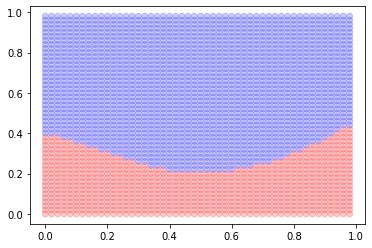

In [0]:
#시각화

node = 5            ##  5 or 10
iteration = 500   ## 500, 1000, 3000, 6000 학습횟수.

learning_rate = 0.1

x_data = [[0, 0],       [0, 1],            [1, 0],         [1, 1]]
y_data = [[0],       [1],        [1],        [0]]

x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1])

w1 = tf.Variable(tf.random_normal([2, node]))
b1 = tf.Variable(tf.random_normal([node]))
layer1 = tf.sigmoid(tf.matmul(x, w1) + b1)

w2 = tf.Variable(tf.random_normal([node, 1]))
b2 = tf.Variable(tf.random_normal([1]))
hypothesis = tf.sigmoid(tf.matmul(layer1, w2) + b2)


cost = -tf.reduce_mean(y * tf.log(hypothesis) + (1 - y) * tf.log(1 - hypothesis))  

train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))


sess.run(tf.global_variables_initializer())

for step in range(iteration):
        sess.run(train, feed_dict={x: x_data, y: y_data})
        p, a, c =  sess.run([predicted, accuracy, cost], feed_dict={x: x_data, y: y_data})
        if step % 500 == 0 :
            print(step, p.reshape(1,4), a, c) 
            
            
xx, yy = np.mgrid[0:1:0.02, 0:1:0.02] #0~1사이의 값을 격자 모양으로 나눔.
grid = np.c_[xx.flatten(), yy.flatten()] #2500*2 행렬이 됨.
h = sess.run(hypothesis, feed_dict={x: grid})
colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  
plt.savefig('xor%d_%d.png' % (node, iteration)) #출력 이미지를 저장. 은닉 노드와 학습횟수
#학습 된 것이 직선 곡선으로 다양하게 나타날 수 있음.
#학습횟수가 많을 수록 결정경계면이 점점 정교해짐.

In [0]:
#은닉층 2개로 xor

input = 2

node_1 = 10 #첫번째 은닉층의 노드 개수
w1 = tf.Variable(tf.random_normal([input, node_1])) #입력층과 첫번째 은닉층 사이의 w와 b
b1 = tf.Variable(tf.random_normal([node_1]))
layer1 = tf.sigmoid(tf.matmul(x, w1) + b1)

node_2 = 10 #두번째 은닉층의 노드 개수
w2 = tf.Variable(tf.random_normal([node_1, node_2]))#두번째 은닉층과 출력층 사이의 w와 b
b2 = tf.Variable(tf.random_normal([node_2]))
layer2 = tf.sigmoid(tf.matmul(layer1, w2) + b2)

output = 1 #마지막 출력층의 노드 개수
w_o = tf.Variable(tf.random_normal([node_2, output])) #[행은 이전층, 열은 현재층의 노드의 개수]
b_o = tf.Variable(tf.random_normal([output])) #바이어스는 모두 1차
hypothesis = tf.sigmoid(tf.matmul(layer2, w_o) + b_o)

#다층으로 신경망 구성할 때는 각 텐서 행렬의 크기를 정확하게 구성.

In [0]:
cost = -tf.reduce_mean(y * tf.log(hypothesis) + (1 - y) * tf.log(1 - hypothesis))  
train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

1 [[0. 0. 0. 0.]] 0.5 0.74294466
501 [[0. 0. 1. 0.]] 0.75 0.5456687
1001 [[0. 1. 1. 0.]] 1.0 0.21404596
1501 [[0. 1. 1. 0.]] 1.0 0.067520544
2001 [[0. 1. 1. 0.]] 1.0 0.032360703
2501 [[0. 1. 1. 0.]] 1.0 0.019831259
3001 [[0. 1. 1. 0.]] 1.0 0.013868368
step 3000
accuracy 1.0


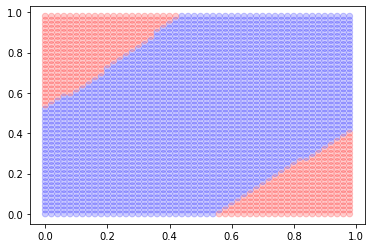

In [0]:
sess.run(tf.global_variables_initializer())

for step in range(3001):
        sess.run(train, feed_dict={x: x_data, y: y_data})
        p, a, c =  sess.run([predicted, accuracy, cost], feed_dict={x: x_data, y: y_data})
        if step % 500 == 0 :
            print(step+1, p.reshape(1,4), a, c) 

#학습 결과를 시각화.(결정경계면)
xx, yy = np.mgrid[0:1:0.02, 0:1:0.02]
grid = np.c_[xx.flatten(), yy.flatten()]
p = sess.run(hypothesis, feed_dict={x: grid})
colors = ["red"  if i>  0.5  else  "blue"  for i  in p   ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)
            
print("step" , step)
print("accuracy", a)
#은닉층이 한개일때에 비해 많은 학습 갯수가 요구.
#은닉층의 개수가 많을수록 복잡한 결정경계를 만듬.

In [0]:
#3개의 은닉층으로 xor

input = 2
hidden_1 = 10
w1 = tf.Variable(tf.random_normal([input, hidden_1]))
b1 = tf.Variable(tf.random_normal([hidden_1]))
layer1 = tf.sigmoid(tf.matmul(x, w1) + b1)

hidden_2 = 10
w2 = tf.Variable(tf.random_normal([hidden_1, hidden_2]))
b2 = tf.Variable(tf.random_normal([hidden_2]))
layer2 = tf.sigmoid(tf.matmul(layer1, w2) + b2)

hidden_3 = 10
w3 = tf.Variable(tf.random_normal([hidden_2, hidden_3]))
b3 = tf.Variable(tf.random_normal([hidden_3]))
layer3 = tf.sigmoid(tf.matmul(layer2, w3) + b3)

output = 1
w_o = tf.Variable(tf.random_normal([hidden_3, output]))
b_o = tf.Variable(tf.random_normal([output]))
hypothesis = tf.sigmoid(tf.matmul(layer3, w_o) + b_o)

In [0]:
cost = -tf.reduce_mean(y * tf.log(hypothesis) + (1 - y) * tf.log(1 - hypothesis))  

train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

0 [[0. 0. 0. 0.]] 0.5 1.1691173
500 [[0. 1. 0. 0.]] 0.75 0.65222955
1000 [[0. 1. 0. 0.]] 0.75 0.5357472
1500 [[0. 1. 1. 0.]] 1.0 0.26269558
2000 [[0. 1. 1. 0.]] 1.0 0.05996824
2500 [[0. 1. 1. 0.]] 1.0 0.027436625
3000 [[0. 1. 1. 0.]] 1.0 0.016966354


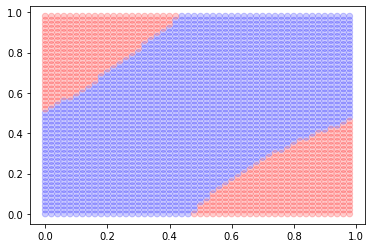

In [0]:
sess.run(tf.global_variables_initializer())

for step in range(3001):
        sess.run([train, cost], feed_dict={x: x_data, y: y_data})
        p, a, c =  sess.run([predicted, accuracy, cost], feed_dict={x: x_data, y: y_data})
        if step % 500 == 0 :
            print(step, p.reshape(1,4), a, c) 

#시각화
xx, yy = np.mgrid[0:1:0.02, 0:1:0.02]
grid = np.c_[xx.ravel(), yy.ravel()]
p = sess.run(hypothesis, feed_dict={x: grid})
colors = ["red"  if i>  0.5  else  "blue"  for i  in p   ]
plt.scatter(np.array([xx]).flatten(), np.array([yy]).flatten(), color = colors, alpha=0.2)

#은닉층을 하나 더 집어넣어서 학습시간이 좀 더 걸림 코드도 길어지고 분석하기 어려워짐.

In [0]:
#다층 신경망을 쉽게 구성할 수 있도록 addlayer함수 만듬.
def addLayer(x, node) :    #x는 입력 혹은 이전 층의 출력 데이터, 노드는 은닉층의 노드 개수.
    input = x.shape.as_list()[1]  #x는 텐서 타입. 텐서의 행과 열의 크기는 shape의 as_list 을 통해 알 수있음.
    #행은 학습데이터의 크기(none) 열은 입력데이터의 차원수 
    w = tf.Variable(tf.random_normal([input, node])) #[입력층의 노드수 ,출력할 노드 수]
    b = tf.Variable(tf.random_normal([node]))
    layer = tf.sigmoid(tf.matmul(x, w) + b)
    return layer

In [0]:
layer_1 = addLayer(x, 5)
layer_2 = addLayer(layer_1, 10)
layer_3 = addLayer(layer_2, 10)
layer_4 = addLayer(layer_3, 5)
hypothesis = addLayer(layer_4, 1)

In [0]:
cost = -tf.reduce_mean(y * tf.log(hypothesis) + (1 - y) * tf.log(1 - hypothesis))  

train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))


sess.run(tf.global_variables_initializer())

for step in range(6001): #신경망이 커져서 많은 학습횟수가 필요.
        sess.run([train, cost], feed_dict={x: x_data, y: y_data})
        p, a, c =  sess.run([predicted, accuracy, cost], feed_dict={x: x_data, y: y_data})
        if step % 1000 == 0 :
            print(step, p.reshape(1,4), a, c) # 예측값, 정확도, 코스트

  #학습이 진행됨에 따라 정확도가 높아짐.

0 [[0. 0. 0. 0.]] 0.5 0.740589
1000 [[0. 0. 1. 1.]] 0.5 0.69213086
2000 [[0. 0. 1. 0.]] 0.75 0.6860941
3000 [[0. 0. 1. 0.]] 0.75 0.6231369
4000 [[0. 1. 1. 0.]] 1.0 0.045231834
5000 [[0. 1. 1. 0.]] 1.0 0.013930148
6000 [[0. 1. 1. 0.]] 1.0 0.008076051


In [0]:
#은닉층이 여러 개일때 선형 함수를 사용했을 때의 문제점을 알아봄
hidden_1 =  5
w1 = tf.Variable(tf.random_normal([2, hidden_1]))
b1 = tf.Variable(tf.random_normal([hidden_1]))
layer1 = tf.matmul(x, w1) + b1

hidden_2 = 6
w2 = tf.Variable(tf.random_normal([hidden_1, hidden_2]))
b2 = tf.Variable(tf.random_normal([hidden_2]))
layer2 = tf.matmul(layer1, w2) + b2

output = 1
w_o = tf.Variable(tf.random_normal([hidden_2, output]))
b_o = tf.Variable(tf.random_normal([output]))
hypothesis = tf.matmul(layer2, w_o) + b_o

In [0]:
cost = tf.reduce_mean(tf.square(hypothesis - y)) #cost함수로 평균제곱근 오차를 사용.

train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

In [0]:
sess.run(tf.global_variables_initializer())

for step in range(8):
        sess.run(train, feed_dict={x: x_data, y: y_data})
        h, c = sess.run([hypothesis, cost], feed_dict={x: x_data, y: y_data})        
        print(h.reshape(1,4), c)     

#cost가 발산되어 학습이 제대로 되지 않을 수 있음.
#추정값이 계속해서 여러 계층을 거치며 기하급수적으로 증가함.
#이와 같이 선형함수를 사용하면 발산할 가능성이 높음.

[[  1.7176085 -15.072519    3.148288  -13.641841 ]] 1.7369175
[[  1.7176085 -15.072519    3.148288  -13.641841 ]] 1.6570728
[[  1.7176085 -15.072519    3.148288  -13.641841 ]] 1.5776296
[[  1.7176085 -15.072519    3.148288  -13.641841 ]] 1.4986494
[[  1.7176085 -15.072519    3.148288  -13.641841 ]] 1.4202998
[[  1.7176085 -15.072519    3.148288  -13.641841 ]] 1.3429027
[[  1.7176085 -15.072519    3.148288  -13.641841 ]] 1.2669785
[[  1.7176085 -15.072519    3.148288  -13.641841 ]] 1.1932814


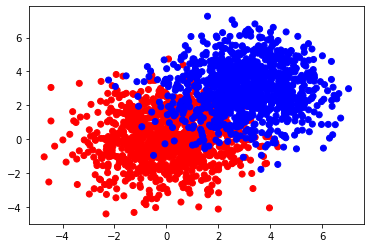

In [0]:
#평균이 다른 두개의 분포를 분리.
samples = 1000
x_data0 = np.random.normal(0, 1.5, size=[samples,2]) #평균 0 표.편1.5
x_data1 = np.random.normal(3, 1.5, size=[samples,2])
x_data = np.vstack([x_data0, x_data1]) #만든 두개의 그룹을 위아래로 연결해 xdata에 저장. 2000*2
y_data = np.hstack([np.zeros(samples), np.ones(samples)]).reshape(samples*2,1)  

colors = ["red"  if i == 0  else  "blue"  for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors) #("x축(전체데이터의 첫번째 행의 값", y축(전체데이터의 두번째 행), "색 ")

In [0]:
x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1])

layer_1 = addLayer(x, 5)
layer_2 = addLayer(layer_1, 5)
hypothesis = addLayer(layer_2, 1)

1 0.572 0.6717733
1001 0.9115 0.21932745
2001 0.912 0.20939243
3001 0.9125 0.20661739
4001 0.914 0.20504111
5001 0.9135 0.20392713
6001 0.913 0.20298846


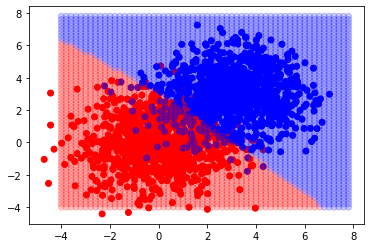

In [0]:
cost = -tf.reduce_mean(y * tf.log(hypothesis) + (1 - y) * tf.log(1 - hypothesis))  

train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

sess.run(tf.global_variables_initializer())

for step in range(6001):
        sess.run(train, feed_dict={x: x_data, y: y_data})
        a, c =  sess.run([accuracy, cost], feed_dict={x: x_data, y: y_data})
        if step % 1000 == 0 :
            print(step+1, a, c) 
            
colors = ["red"  if i == 0  else  "blue"  for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors)

xx, yy = np.mgrid[-4:8:0.2, -4:8:0.2]
grid = np.c_[xx.flatten(), yy.flatten()]

h = sess.run(hypothesis, feed_dict={x: grid})
colors = ["red"  if i<  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)     

#결정경계면이 약간 구부러진 형태로 두 그룹으로 분포 -> 정확도 up

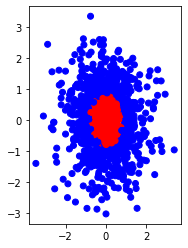

In [0]:
#비선형분포 2개를 다층 신경망으로 분리.
samples = 1000
x_data = np.random.normal(0, 1, size=[samples,2]) 
d = np.sqrt([x[0]**2+x[1]**2  for x in x_data ]) #거리 계산.
y_data = np.array([0  if   i < 0.8   else   1 for i  in d   ]).reshape(samples, 1) #거리에 따라 학습데이터 분류
colors = ["red"  if   i  == 0  else   "blue"  for i  in y_data   ]
plt.subplot(121)
plt.scatter(x_data[:,0], x_data[:,1], color=colors)

0 0.716 0.6267124
2000 0.847 0.39308897
4000 0.976 0.1150097
6000 0.984 0.07296651
8000 0.992 0.05371967
10000 0.995 0.0426254
12000 0.995 0.03640992
14000 0.995 0.03234526


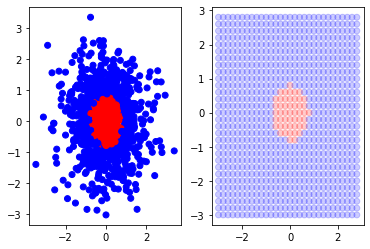

In [0]:
x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1])

# 단층 신경망
hypothesis = addLayer(x, 1)

# 은닉층 한개 
layer_1 = addLayer(x, 10)
hypothesis = addLayer(layer_1, 1)

# 은닉층 두개
layer_1 = addLayer(x, 10)
layer_2 = addLayer(layer_1, 5)
hypothesis = addLayer(layer_2, 1)


#학습횟수가 많을 경우 log부분이 0이 될 수 있음
#이는 마이너스 무한대가 될 수 있어서 올바른 cost 계산이 안될수도 있음
#그래서 매우 작은 값 e-10을 더해줌.
cost = -tf.reduce_mean(y * tf.log(hypothesis+1e-10) + (1 - y) * tf.log(1 - hypothesis+1e-10))  

train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

sess.run(tf.global_variables_initializer())

for step in range(15001):
        sess.run([train, cost], feed_dict={x: x_data, y: y_data})
        p, a, c =  sess.run([predicted, accuracy, cost], feed_dict={x: x_data, y: y_data})
        if step % 2000 == 0 :
            print(step, a, c)           

colors = ["red"  if   i  == 0  else   "blue"  for i  in y_data   ]
plt.subplot(121)
plt.scatter(x_data[:,0], x_data[:,1], color=colors)

xx, yy = np.mgrid[-3.0:3:0.2, -3.0:3.0:0.2]
grid = np.c_[xx.ravel(), yy.ravel()]

p = sess.run(hypothesis, feed_dict={x: grid})
colors = ["red"  if i<  0.5  else  "blue"  for i  in p   ]
plt.subplot(122)
plt.scatter(np.array([xx]).flatten(), np.array([yy]).flatten(), color = colors, alpha=0.2)

#은닉층을 사용하지 않을 경우 정확도 72%에서 더 이상 올라갈 수 없음(비선형 분포를 분류할 수 없음)
#은닉층을 사용할 수록 더 잘 분류되는 것을 알 수 있음. 시간이 좀 더 걸림.

In [0]:
from google.colab import drive #구글 드라이브에서 정보를 가져오기 위해서 코랩과 구글 드라이브를 연동.
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#유방암 진단 실제 데이터 셋으로 활용해보자
my_data = pd.read_csv("/content/drive/My Drive/files/wdbc.csv", delimiter=',')

#6개의 측정값만 추출해 df에 저장. dia는 0은 양성 1은 음성(y 데이터) 나머지는 x데이터
df = my_data[['diagnosis_numeric', 'radius', 'texture','perimeter', 'area', 'smoothness']]

df.head(5)

,diagnosis_numeric,radius,texture,perimeter,area,smoothness
0,0,13.540,14.36,87.46,566.3,0.09779
1,0,13.080,15.71,85.63,520.0,0.10750
2,0,9.504,12.44,60.34,273.9,0.10240
3,0,13.030,18.42,82.61,523.8,0.08983
4,0,8.196,16.84,51.71,201.9,0.08600


In [0]:
data = df.values #values 함수를 사용해 데이터만 넘파이객체로 변환
print(data.shape)     #  행렬의 크기를 출력 569(학습데이터 수) x 6(추출한 열)
x_data = data[:, 1:6]  #x데이터는 dia를 제외한 나머지 데이터를 가짐. 569*5
y_data = data[:,0].reshape(569,1) #0번째 인덱스를 추출하여 y데이터에 저장. 1차원벡터여서 행렬의 곱을 위해
#2차원 행렬로 reshape함.

x_data = x_data / x_data.max(axis=0) #행(axis=0)을 기준으로 x_data의 값을 정규화 함. 

(569, 6)


In [0]:
x = tf.placeholder(tf.float32, [None, 5]) #[정해지지 않은 학습 데이터 개수, 5개의 측정치]
y = tf.placeholder(tf.float32, [None, 1])


layer_1 = addLayer(x, 10)
layer_2 = addLayer(layer_1, 20)
layer_3 = addLayer(layer_2, 10)
hypothesis = addLayer(layer_3, 1)

In [0]:
cost = -tf.reduce_mean(y * tf.log(hypothesis) + (1 - y) * tf.log(1 - hypothesis))  

train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

sess.run(tf.global_variables_initializer())

for step in range(10001):
        sess.run(train, feed_dict={x: x_data, y: y_data})
        a, c =  sess.run([accuracy, cost], feed_dict={x: x_data, y: y_data})
        if step % 1000 == 0 :
            print(step, a, c)   

#93퍼센트의 확률로 찾아낼 수 있음.
#비선형 활성화 함수를 사용한 다층 신경망은 비선형 분포를 효과적으로 분류할 수 있음.

0 0.37258348 0.77886355
1000 0.91212654 0.23699431
2000 0.92794377 0.1713771
3000 0.93321615 0.16065381
4000 0.93321615 0.15871388
5000 0.93321615 0.15796542
6000 0.93321615 0.1573785
7000 0.93321615 0.15678866
8000 0.93321615 0.15615462
9000 0.93321615 0.1554559
10000 0.93321615 0.1546788
